# Основы навигационных систем - Лекция 1-2
# Тема: Введение в навигационные системы
### Общие понятия и классификация

### Основные задачи навигационных систем

1. **Определение местоположения**  
   Это процесс установления текущих координат объекта или транспортного средства в определённой системе координат. Знание координат объекта может использоваться для задач планирования маршрута объекта, выработки управляющих воздействий на его актуаторы.

2. **Определение скоростей движения**  
   Измерение или вычисление скорости, с которой объект перемещается в пространстве. Знание скорости необходимо для прогнозирования будущего положения объекта, а также для контроля и управления его движением. Скорость может быть линейной (перемещение в пространстве) и угловой (вращение вокруг осей).

3. **Определение ориентации в пространстве**  
   Определение углового положения объекта относительно базовых осей координат. Ориентация включает параметры крена, тангажа и рыскания, которые описывают наклон и поворот объекта. Это важно для правильного управления движением и стабилизации объекта, особенно в авиации и судоходстве.

4. **Построение траекторий движения**  
   Задача планирования и отслеживания пути, по которому объект перемещается или должен перемещаться. Включает анализ пройденного пути, прогнозирование будущего движения, оптимизацию маршрута и обеспечение безопасности передвижения. Траектория может быть трёхмерной и учитывать различные факторы, такие как препятствия и внешние условия.  

Для решения данных задач применяются навигационные системы, основанные на различных датчиках и алгоритмах.


### Классификация навигационных систем

1. **Инерциальные навигационные системы (ИНС)**  
   Автономные системы, использующие инерциальные датчики — акселерометры и гироскопы — для измерения ускорений и угловых скоростей объекта. На основе этих данных система вычисляет текущее местоположение, скорость и ориентацию автономно. ИНС обладают высокой частотой обновления данных и устойчивостью к внешним помехам, однако накапливают ошибки (дрейф) со временем из-за погрешностей датчиков.

2. **Спутниковые навигационные системы (СНС)**  
   Системы, использующие сигналы от глобальных навигационных спутниковых систем, для определения местоположения, скорости и времени. Приёмник СНС обрабатывает сигналы от нескольких спутников для вычисления своих координат с высокой точностью. Эти системы обеспечивают глобальное покрытие, но могут испытывать затруднения в условиях плохой видимости спутников, например, в городских каньонах или под водой.

3. **Корреляционно-экстремальные системы**  
   Навигационные системы, которые определяют местоположение путём сопоставления текущих наблюдаемых данных с эталонными (предварительно известными) данными местности. Это может включать сопоставление радиолокационных или оптических изображений с картами местности. Метод основан на поиске экстремума функции корреляции между текущими и эталонными данными, что позволяет точно определить позицию объекта относительно окружающей среды.

4. **Системы визуальной одометрии и SLAM алгоритмы**  
   - **Визуальная одометрия**: метод вычисления относительного перемещения путём анализа последовательности изображений, полученных камерой. Используется для определения траектории движения в реальном времени без внешних ориентиров.
   - **SLAM (Simultaneous Localization and Mapping)**: алгоритмы, которые одновременно строят карту неизвестной среды и определяют местоположение объекта внутри этой карты. SLAM широко применяется в робототехнике, автономных транспортных средствах и беспилотных летательных аппаратах для навигации в незнакомых или динамических средах.

5. **Комплексные системы навигации**  
   Системы, которые объединяют данные от различных навигационных сенсоров и источников для повышения точности, надёжности и устойчивости к помехам. Например:
   - **ИНС/СНС интеграция**: сочетает автономность и высокую частоту обновления ИНС с глобальной точностью СНС. СНС корректирует накопленные ошибки ИНС, а ИНС обеспечивает непрерывность при потере спутникового сигнала.
   - **ИНС/SLAM**: объединяет инерциальные данные с визуальной информацией для улучшения навигации в условиях, где СНС недоступен.  
   ...

## Инерциальные навигационные системы (ИНС)

### Принцип работы ИНС
Инерциальные навигационные системы основываются на измерении ускорений и угловых скоростей объекта с помощью инерциальных датчиков — акселерометров и гироскопов. Путем интегрирования этих данных во времени можно определить текущую скорость и положение объекта относительно начальной точки.

Основные компоненты ИНС:
- **Акселерометры**: измеряют линейные ускорения по осям
- **Гироскопы**: измеряют угловые скорости вокруг осей
- **Бортовой вычислитель**: обрабатывает данные и вычисляет параметры движения

### Преимущества и недостатки ИНС
#### Преимущества:
- Автономность (не требуют внешних сигналов)
- Высокая краткосрочная точность
- Высокая частота обновления данных

#### Недостатки:
- Накопление ошибок (дрейф) со временем
- Требуют калибровки и коррекции
- Высокая стоимость высокоточных датчиков

### Пример: Моделирование ИНС в 2D
Рассмотрим пример движения объекта по кругу. Используя данные акселерометра, определим скорость и положение объекта.

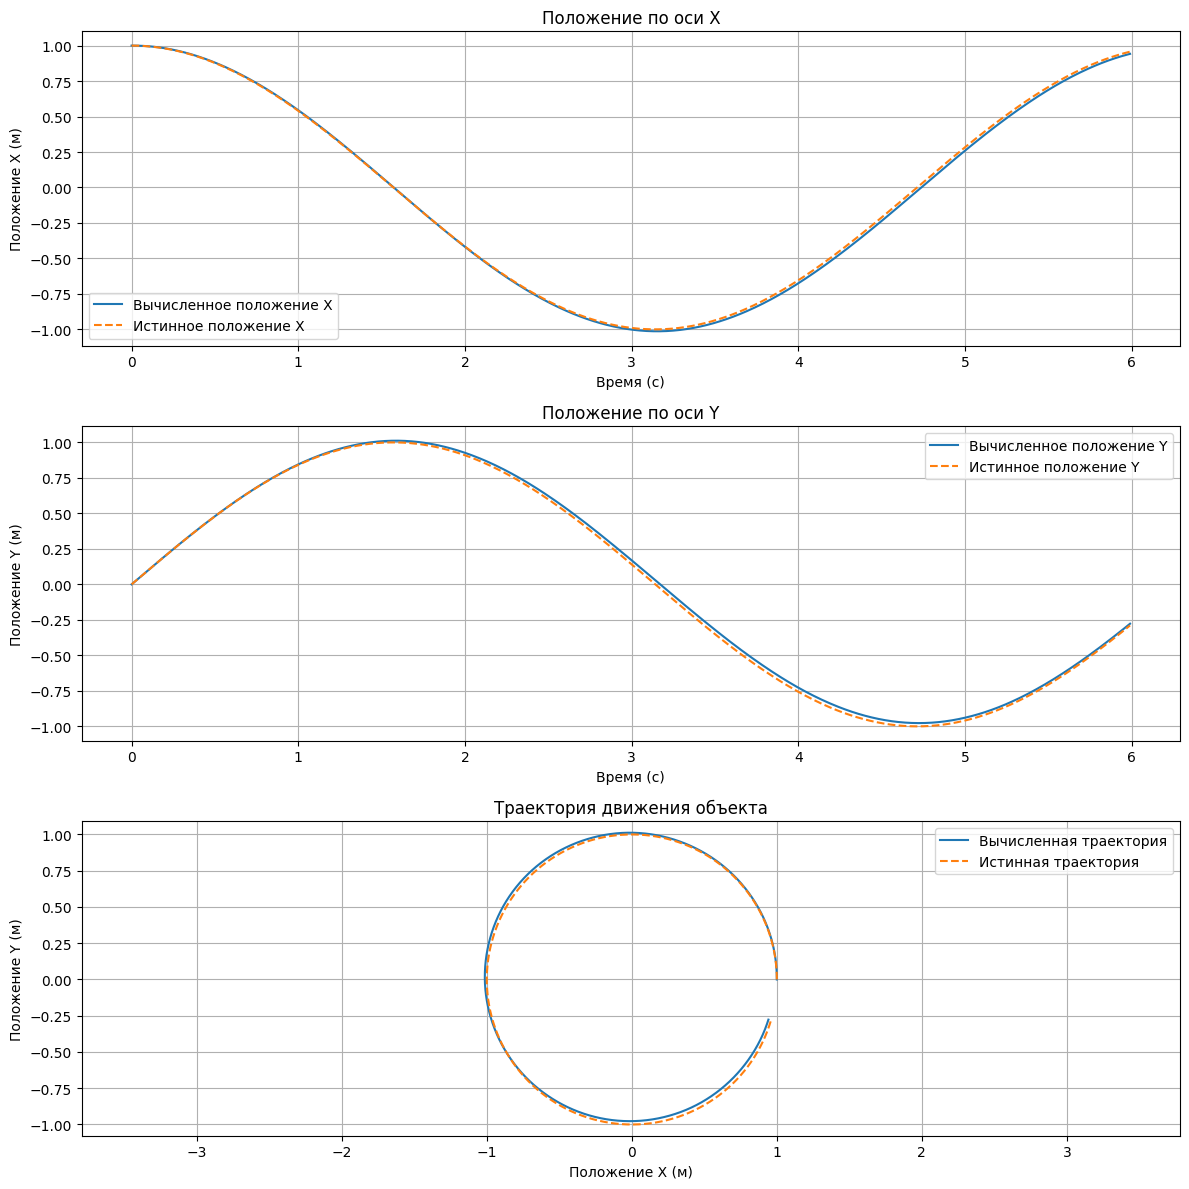

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Время моделирования
t_total = 6   # секунд
dt = 0.01     # шаг дискретизации
t = np.arange(0, t_total, dt)

# Параметры движения по окружности
R = 1.0       # радиус окружности (метры)
omega = 1.0   # угловая скорость (рад/с)

# Истинные значения положений
x_true = R * np.cos(omega * t)
y_true = R * np.sin(omega * t)

# Истинные значения скоростей
v_x_true = -R * omega * np.sin(omega * t)
v_y_true = R * omega * np.cos(omega * t)

# Истинные значения ускорений (центростремительное ускорение)
a_x_true = -R * omega**2 * np.cos(omega * t)
a_y_true = -R * omega**2 * np.sin(omega * t)

# Моделирование данных акселерометра с шумом
noise_std = 0.05  # стандартное отклонение шума
a_x_measured = a_x_true + np.random.normal(0, noise_std, size=len(t))
a_y_measured = a_y_true + np.random.normal(0, noise_std, size=len(t))

# Интегрирование ускорения для получения скоростей
v_x = np.zeros(len(t))
v_y = np.zeros(len(t))
v_x[0] = v_x_true[0]
v_y[0] = v_y_true[0]

for i in range(1, len(t)):
    v_x[i] = v_x[i-1] + a_x_measured[i-1] * dt
    v_y[i] = v_y[i-1] + a_y_measured[i-1] * dt

# Интегрирование скоростей для получения положений
x = np.zeros(len(t))
y = np.zeros(len(t))
x[0] = x_true[0]
y[0] = y_true[0]

for i in range(1, len(t)):
    x[i] = x[i-1] + v_x[i-1] * dt
    y[i] = y[i-1] + v_y[i-1] * dt

# Построение графиков
plt.figure(figsize=(12, 12))

# График положения по оси X
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Вычисленное положение X')
plt.plot(t, x_true, label='Истинное положение X', linestyle='--')
plt.title('Положение по оси X')
plt.xlabel('Время (с)')
plt.ylabel('Положение X (м)')
plt.legend()
plt.grid()

# График положения по оси Y
plt.subplot(3, 1, 2)
plt.plot(t, y, label='Вычисленное положение Y')
plt.plot(t, y_true, label='Истинное положение Y', linestyle='--')
plt.title('Положение по оси Y')
plt.xlabel('Время (с)')
plt.ylabel('Положение Y (м)')
plt.legend()
plt.grid()

# Траектория движения объекта
plt.subplot(3, 1, 3)
plt.plot(x, y, label='Вычисленная траектория')
plt.plot(x_true, y_true, label='Истинная траектория', linestyle='--')
plt.title('Траектория движения объекта')
plt.xlabel('Положение X (м)')
plt.ylabel('Положение Y (м)')
plt.legend()
plt.axis('equal')
plt.grid()

plt.tight_layout()
plt.show()


## Спутниковые навигационные системы (СНС)

### Обзор СНС
Глобальные навигационные спутниковые системы позволяют определять координаты объектов на Земле на основе информации о расстоянии от объекта до спутников на орбите Земли. Основные системы:
- **GPS** (Global Positioning System, США)
- **ГЛОНАСС** (Россия)
- **Galileo** (Европейский Союз)
- **BeiDou** (Китай)

### Принцип работы СНС (Спутниковых Навигационных Систем)

Принцип работы этих систем основан на измерении времени прохождения сигнала от спутников к приёмнику и вычислении расстояния до них. Далее подробно рассмотрим каждый этап этого процесса.

1. **Спутники передают сигналы с информацией о своём положении и времени**

   Спутники СНС постоянно излучают радиосигналы, которые содержат навигационные сообщения. Эти сообщения включают:

   - **Эфемериды**: точные данные о текущем положении спутника на его орбите, необходимые для вычисления координат спутника в любой момент времени.
   - **Альманах**: менее точные орбитальные данные всех спутников системы, используемые для быстрого определения видимых спутников и их приблизительного положения.
   - **Временная метка**: точное время отправки сигнала, основанное на атомных часах, установленных на борту спутника.
   - **Информация о состоянии спутника**: технические данные и предупреждения о возможных неточностях.

   Использование атомных часов на спутниках обеспечивает передачу очень точного времени, что является критическим для точности навигационных расчётов.

2. **Приёмник измеряет время задержки сигнала от каждого спутника**

   Когда приёмник СНС (например, навигатор или смартфон) включён, он начинает принимать сигналы от видимых спутников. Процесс включает следующие шаги:

   - **Приём сигналов**: антенна приёмника улавливает радиосигналы от нескольких спутников одновременно.
   - **Синхронизация времени**: приёмник сравнивает время, переданное спутником, с собственным временем приёма сигнала.
   - **Измерение времени задержки**: разница между временем отправки и временем приёма сигнала даёт время распространения сигнала от спутника к приёмнику.

   Поскольку приёмник оснащён менее точными часами по сравнению с атомными часами спутника, существует систематическая ошибка времени. Для её коррекции требуется приём сигналов минимум от четырёх спутников.

3. **Вычисляется расстояние до каждого спутника**

   Зная время задержки сигнала и скорость распространения радиоволн (приблизительно равную скорости света в вакууме), приёмник вычисляет псевдодальность до каждого спутника:

   $
   \text{Псевдодальность} = c \times (\text{Время приёма} - \text{Время отправления})
   $

   где $ c $ — скорость света (≈ 299\,792\,458 м/с).

   Однако необходимо учитывать несколько факторов, влияющих на точность измерений:

   - **Ошибки часов приёмника**: поскольку часы приёмника менее точны, чем атомные часы спутника, возникает ошибка синхронизации. Приём сигналов от дополнительного спутника позволяет решить эту проблему, введя дополнительную переменную в систему уравнений.
   - **Задержки в атмосфере**: ионосфера и тропосфера могут замедлять скорость сигнала. Для коррекции используются модели атмосферных задержек или сигналы на разных частотах (в двухчастотных приёмниках).
   - **Многолучевость**: отражение сигнала от зданий или других объектов может приводить к ошибкам.

4. **Методом трилатерации определяется положение приёмника**

   Процесс определения местоположения приёмника на основе известных расстояний до спутников называется **трилатерацией** (не путать с триангуляцией, которая использует углы).

   - **Составление системы уравнений**: для каждого спутника формируется уравнение сферы с центром в положении спутника и радиусом, равным вычисленной псевдодальности.
   - **Решение системы**: одновременно решая эти уравнения, приёмник вычисляет свои трёхмерные координаты (широту, долготу и высоту) и поправку к своим часам.
   - **Минимальное количество спутников**: для уникального решения требуется минимум четыре спутника — три для определения координат и один для коррекции ошибки времени приёмника.
   - **Итеративные методы**: при наличии более четырёх спутников используются методы наименьших квадратов для улучшения точности, учитывая избыточные измерения.

   В результате приёмник получает своё точное местоположение и может отображать его на карте или использовать для навигации.


**Дополнительные аспекты работы СНС:**

- **Дифференциальный СНС (ДСНС)**: использует наземные станции с известными координатами для передачи коррекций, повышая точность определения положения до сантиметров.

- **Многочастотные приёмники**: использование нескольких частот позволяет корректировать ионосферные задержки, улучшая точность позиционирования.

- **Интеграция с другими системами**: для повышения надёжности СНС часто интегрируется с инерциальными навигационными системами, позволяя продолжать навигацию при временной потере спутниковых сигналов.



### Пример: Моделирование работы СНС
Рассмотрим пример определения координат объекта с помощью 4х спутников

In [63]:
import math

# Радиус Земли в метрах
R_earth = 6371e3  # 6,371 км

# Истинные географические координаты приёмника
lat_deg_true = 55.811539  # Широта в градусах
lon_deg_true = 37.499727  # Долгота в градусах
alt_true = 32     # Высота в метрах

# Переводим в радианы
lat_true = math.radians(lat_deg_true)
lon_true = math.radians(lon_deg_true)

# Преобразуем в декартовы координаты
x_true = (R_earth + alt_true) * math.cos(lat_true) * math.cos(lon_true)
y_true = (R_earth + alt_true) * math.cos(lat_true) * math.sin(lon_true)
z_true = (R_earth + alt_true) * math.sin(lat_true)

print("Истинные декартовы координаты приёмника:")
print(f"x = {x_true:.2f} м")
print(f"y = {y_true:.2f} м")
print(f"z = {z_true:.2f} м")

print(f"R = {math.sqrt(x_true**2 + y_true**2 + z_true**2):.2f} м")
print(f"h = {math.sqrt(x_true**2 + y_true**2 + z_true**2)-R_earth:.2f} м")

Истинные декартовы координаты приёмника:
x = 2840207.33 м
y = 2179346.23 м
z = 5270077.90 м
R = 6371032.00 м
h = 32.00 м


In [69]:
# Координаты спутников (в метрах)
satellites = {
    1: {'x': 15600e3, 'y': 7540e3, 'z': 20140e3},
    2: {'x': 18760e3, 'y': 2750e3, 'z': 18610e3},
    3: {'x': 17610e3, 'y': 14630e3, 'z': 13480e3},
    4: {'x': 19170e3, 'y': 610e3, 'z': 18390e3}
}


# Скорость света
c = 299792458  # м/с

# Поправка времени (предполагаем, что приёмники синхронизирован, т.е. delta_t = 0)
delta_t_true = 0.05  # с

# Вычисляем псевдодальности до спутников
rho = {}
print("\nПсевдодальности до спутников:")
for i, sat in satellites.items():
    dx = x_true - sat['x']
    dy = y_true - sat['y']
    dz = z_true - sat['z']
    distance = math.sqrt(dx**2 + dy**2 + dz**2)
    rho[i] = distance - c * delta_t_true  # delta_t_true = 0, поэтому rho[i] = distance
    print(f"rho{i} = {rho[i]:.2f} м")



Псевдодальности до спутников:
rho1 = -294467960.17 м
rho2 = -294004232.94 м
rho3 = -293792360.19 м
rho4 = -293775954.84 м


In [70]:
import sympy as sp
from scipy.optimize import fsolve

# Объявляем неизвестные переменные
x, y, z, delta_t = sp.symbols('x y z delta_t')

# Составляем уравнения с числовыми значениями
eq1 = (x - satellites[1]['x'])**2 + (y - satellites[1]['y'])**2 + (z - satellites[1]['z'])**2 - (rho[1] - c * delta_t)**2
eq2 = (x - satellites[2]['x'])**2 + (y - satellites[2]['y'])**2 + (z - satellites[2]['z'])**2 - (rho[2] - c * delta_t)**2
eq3 = (x - satellites[3]['x'])**2 + (y - satellites[3]['y'])**2 + (z - satellites[3]['z'])**2 - (rho[3] - c * delta_t)**2
eq4 = (x - satellites[4]['x'])**2 + (y - satellites[4]['y'])**2 + (z - satellites[4]['z'])**2 - (rho[4] - c * delta_t)**2

# Собираем систему уравнений
equations = [eq1, eq2, eq3, eq4]

# Определяем систему уравнений для fsolve
def equations_fsolve(vars):
    x_val, y_val, z_val, delta_t_val = vars
    eq1_val = (x_val - satellites[1]['x'])**2 + (y_val - satellites[1]['y'])**2 + (z_val - satellites[1]['z'])**2 - (rho[1] - c * delta_t_val)**2
    eq2_val = (x_val - satellites[2]['x'])**2 + (y_val - satellites[2]['y'])**2 + (z_val - satellites[2]['z'])**2 - (rho[2] - c * delta_t_val)**2
    eq3_val = (x_val - satellites[3]['x'])**2 + (y_val - satellites[3]['y'])**2 + (z_val - satellites[3]['z'])**2 - (rho[3] - c * delta_t_val)**2
    eq4_val = (x_val - satellites[4]['x'])**2 + (y_val - satellites[4]['y'])**2 + (z_val - satellites[4]['z'])**2 - (rho[4] - c * delta_t_val)**2
    return [eq1_val, eq2_val, eq3_val, eq4_val]

# Начальные приближения для переменных
initial_guess = [x_true, y_true, z_true, 0]  # delta_t_true = 0

# Решаем систему уравнений с помощью fsolve
solution, info, ier, mesg = fsolve(equations_fsolve, initial_guess, full_output=True)

# Проверяем, сошёлся ли метод
if ier == 1:
    x_sol, y_sol, z_sol, delta_t_sol = solution
    print("\nРешение системы уравнений:")
    print(f"x = {x_sol:.2f} м")
    print(f"y = {y_sol:.2f} м")
    print(f"z = {z_sol:.2f} м")
    print(f"delta_t = {delta_t_sol:.10f} с")
else:
    print("\nРешение не найдено:")
    print(mesg)




Решение системы уравнений:
x = -5406016.10 м
y = -4111345.89 м
z = -9876040.53 м
delta_t = -0.8540027860 с


In [72]:
# Преобразование в географические координаты
def cartesian_to_geodetic(x, y, z):
    """
    Преобразует декартовы координаты (x, y, z) в географические (широта, долгота, высота).
    Предполагается, что Земля — сфера с радиусом R_earth.
    """
    # Радиус точки
    r = math.sqrt(x**2 + y**2 + z**2)
    
    # Долгота в радианах
    longitude = math.atan2(y, x)
    
    # Широта в радианах
    latitude = math.atan2(z, math.sqrt(x**2 + y**2))
    
    # Высота над поверхностью Земли
    altitude = r - R_earth
    
    # Переводим в градусы
    latitude_deg = math.degrees(latitude)
    longitude_deg = math.degrees(longitude)
    
    return latitude_deg, longitude_deg, altitude

# Проверяем, сошёлся ли метод
if ier == 1:
    latitude, longitude, altitude = cartesian_to_geodetic(x_sol, y_sol, z_sol)
    
    print("\nГеографические координаты приёмника:")
    print(f"Широта: {latitude:.6f}°")
    print(f"Долгота: {longitude:.6f}°")
    print(f"Высота: {altitude:.2f} м")



Географические координаты приёмника:
Широта: -55.483620°
Долгота: -142.746537°
Высота: 5615006.49 м


## Корреляционно-экстремальные системы

### Принцип работы
Корреляционно-экстремальные системы определяют положение объекта путем сравнения текущих данных сенсоров с эталонными данными местности (картами, профилями глубин и т.д.).

Основные этапы:
- **Сбор текущих данных** (например, рельеф местности)
- **Сопоставление с эталонными данными**
- **Определение местоположения** по наилучшему совпадению (максимум корреляции)

### Применение
- Подводные лодки (по профилю дна)
- Авиация (по рельефу местности)
- Робототехника (по визуальным данным)

### Пример: Сопоставление профиля глубин
Допустим, подводная лодка измеряет глубину под собой и пытается определить свое положение, сопоставляя измерения с картой глубин.

Оцененное смещение: 50 точек
Истинное смещение: 50 точек
Разница: 0 точек


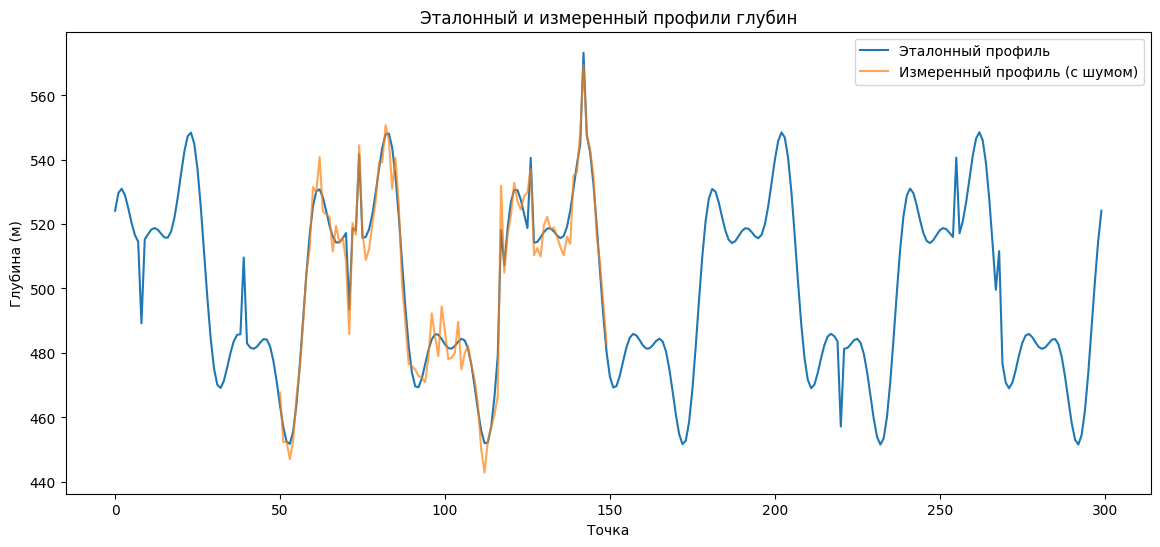

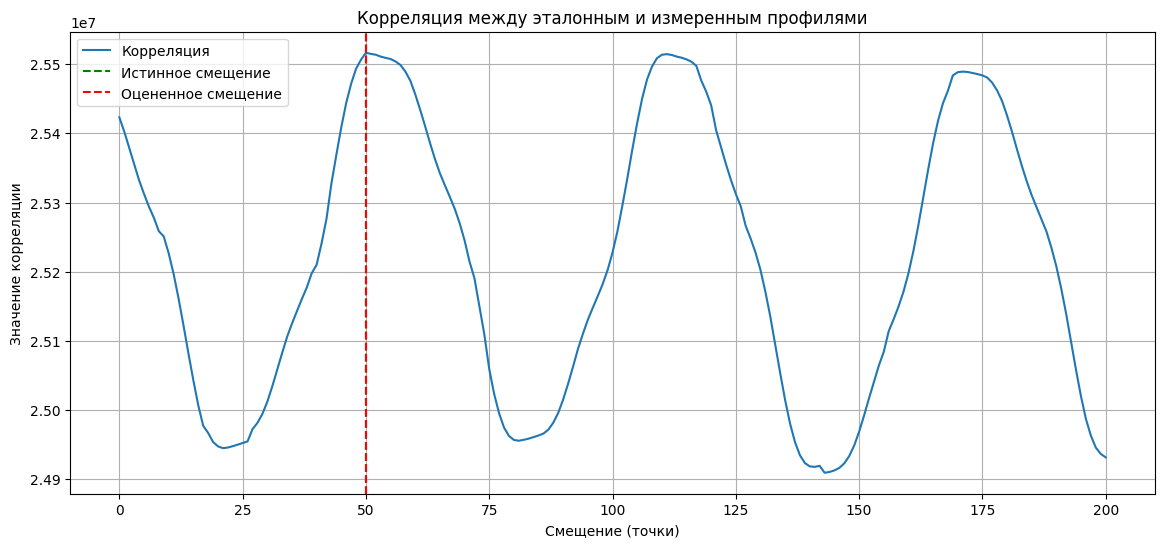

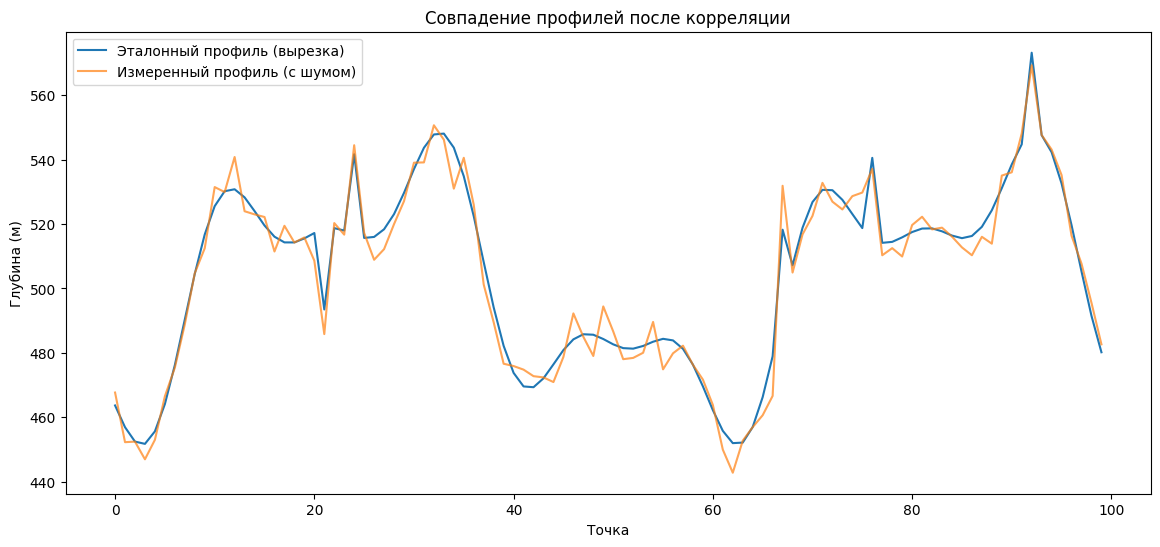


Средняя ошибка смещения: 32.01 точек
Стандартное отклонение ошибки: 32.68 точек


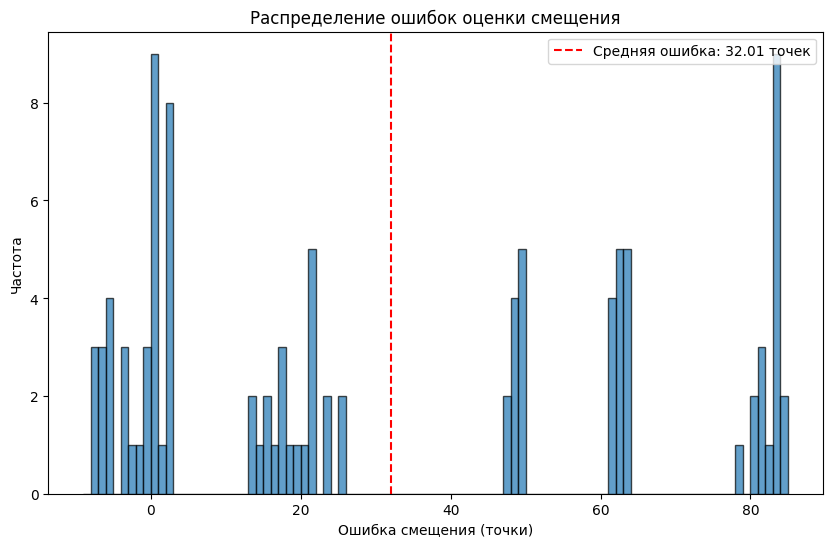

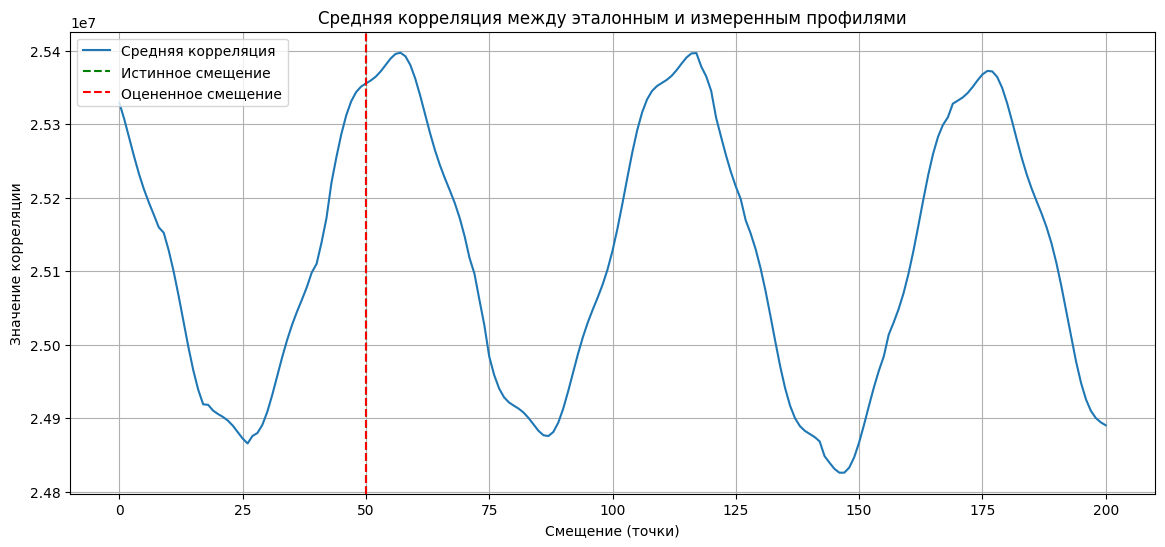

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для генерации сложного эталонного профиля глубин
def generate_complex_depth_profile(num_points=300):
    """
    Генерирует сложный эталонный профиль глубин путем суммы нескольких синусоидальных волн
    и добавления случайных аномалий.
    
    :param num_points: Количество точек в профиле
    :return: numpy массив, представляющий профиль глубин
    """
    x = np.linspace(0, 10 * np.pi, num_points)
    # Сумма синусоид с разными частотами и амплитудами
    depth_profile = (
        30 * np.sin(1 * x) +
        20 * np.sin(3 * x + np.pi / 4) +
        10 * np.sin(5 * x + np.pi / 2)
    ) + 500  # Смещение глубины
    
    # Добавляем случайные аномалии (пики и впадины)
    num_anomalies = 10
    anomaly_indices = np.random.choice(num_points, num_anomalies, replace=False)
    depth_profile[anomaly_indices] += np.random.choice([-25, 25], size=num_anomalies)
    
    return depth_profile

# Функция для генерации измеренного профиля с заданным смещением и уровнем шума
def generate_measured_profile(depth_profile, shift_points, noise_std=5):
    """
    Генерирует измеренный профиль глубин путем смещения эталонного профиля и добавления шума.
    
    :param depth_profile: Эталонный профиль глубин (numpy массив)
    :param shift_points: Количество точек для смещения
    :param noise_std: Стандартное отклонение для гауссовского шума
    :return: Измеренный профиль глубин (numpy массив)
    """
    # Проверка, чтобы смещение не выходило за пределы профиля
    if shift_points < 0 or shift_points + 100 > len(depth_profile):
        raise ValueError("Смещение выходит за пределы профиля глубин.")
    
    measured_profile = depth_profile[shift_points:shift_points + 100].copy()
    measured_profile += np.random.normal(0, noise_std, size=100)  # Добавляем шум
    return measured_profile

# Параметры эксперимента
true_shift = 50    # истинное смещение в точках (меньшее смещение)
noise_std = 5      # стандартное отклонение шума
num_trials = 100   # количество повторений эксперимента

# Генерируем эталонный профиль
depth_profile = generate_complex_depth_profile()

# Генерируем измеренный профиль с истинным смещением
measured_profile = generate_measured_profile(depth_profile, true_shift, noise_std)

# Поиск положения с максимальной корреляцией
correlation = np.correlate(depth_profile, measured_profile, mode='valid')
estimated_shift = np.argmax(correlation)

print(f"Оцененное смещение: {estimated_shift} точек")
print(f"Истинное смещение: {true_shift} точек")
print(f"Разница: {estimated_shift - true_shift} точек")

# Визуализация эталонного и измеренного профилей
plt.figure(figsize=(14, 6))
plt.plot(depth_profile, label='Эталонный профиль')
plt.plot(range(true_shift, true_shift + 100), measured_profile, label='Измеренный профиль (с шумом)', alpha=0.7)
plt.title('Эталонный и измеренный профили глубин')
plt.xlabel('Точка')
plt.ylabel('Глубина (м)')
plt.legend()
plt.show()

# Визуализация корреляционной функции
plt.figure(figsize=(14, 6))
plt.plot(correlation, label='Корреляция')
plt.axvline(x=true_shift, color='green', linestyle='--', label='Истинное смещение')
plt.axvline(x=estimated_shift, color='red', linestyle='--', label='Оцененное смещение')
plt.title('Корреляция между эталонным и измеренным профилями')
plt.xlabel('Смещение (точки)')
plt.ylabel('Значение корреляции')
plt.legend()
plt.grid()
plt.show()

# Визуализация совпадения профилей после корреляции
plt.figure(figsize=(14, 6))
start = estimated_shift
end = start + 100
plt.plot(depth_profile[start:end], label='Эталонный профиль (вырезка)')
plt.plot(measured_profile, label='Измеренный профиль (с шумом)', alpha=0.7)
plt.title('Совпадение профилей после корреляции')
plt.xlabel('Точка')
plt.ylabel('Глубина (м)')
plt.legend()
plt.show()

# Повторение эксперимента для оценки точности
estimated_shifts = []
true_shifts = []
for trial in range(num_trials):
    # Случайное смещение в пределах [true_shift - 20, true_shift + 20]
    random_shift = true_shift + np.random.randint(-20, 21)
    # Убедимся, что смещение в допустимых пределах
    if random_shift < 0:
        random_shift = 0
    elif random_shift + 100 > len(depth_profile):
        random_shift = len(depth_profile) - 100
    
    measured_profile_trial = generate_measured_profile(depth_profile, random_shift, noise_std)
    
    # Вычисляем корреляцию
    correlation_trial = np.correlate(depth_profile, measured_profile_trial, mode='valid')
    estimated_shift_trial = np.argmax(correlation_trial)
    estimated_shifts.append(estimated_shift_trial)
    true_shifts.append(random_shift)

# Вычисляем ошибки
errors = np.array(estimated_shifts) - np.array(true_shifts)
mean_error = np.mean(errors)
std_error = np.std(errors)

print(f"\nСредняя ошибка смещения: {mean_error:.2f} точек")
print(f"Стандартное отклонение ошибки: {std_error:.2f} точек")

# Визуализация распределения ошибок
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=range(int(errors.min()) - 1, int(errors.max()) + 2), edgecolor='black', alpha=0.7)
plt.title('Распределение ошибок оценки смещения')
plt.xlabel('Ошибка смещения (точки)')
plt.ylabel('Частота')
plt.axvline(x=mean_error, color='red', linestyle='--', label=f'Средняя ошибка: {mean_error:.2f} точек')
plt.legend()
plt.show()

# Визуализация среднего корреляционного отклика
# Для лучшей визуализации берём среднюю корреляцию по всем испытаниям
average_measured_profiles = np.array([
    generate_measured_profile(depth_profile, shift, noise_std) 
    for shift in true_shifts
]).mean(axis=0)

mean_correlation = np.correlate(depth_profile, average_measured_profiles, mode='valid')

plt.figure(figsize=(14, 6))
plt.plot(mean_correlation, label='Средняя корреляция')
plt.axvline(x=true_shift, color='green', linestyle='--', label='Истинное смещение')
plt.axvline(x=estimated_shift, color='red', linestyle='--', label='Оцененное смещение')
plt.title('Средняя корреляция между эталонным и измеренным профилями')
plt.xlabel('Смещение (точки)')
plt.ylabel('Значение корреляции')
plt.legend()
plt.grid()
plt.show()


**Описание:** Максимум корреляции соответствует положению, где измеренный профиль наилучшим образом совпадает с эталонным, что позволяет определить текущее местоположение.

## Системы визуальной одометрии и SLAM алгоритмы

### Принцип работы
SLAM (Simultaneous Localization and Mapping) — это алгоритмы, позволяющие одновременно строить карту окружающего пространства и определять положение объекта внутри этой карты, используя данные от сенсоров (камеры, лидары).

Основные компоненты:
- **Извлечение признаков из окружающей среды**
- **Отслеживание изменений признаков во времени**
- **Построение и обновление карты**
- **Оценка собственного положения и ориентации**

### Применение
- Робототехника
- Автономные транспортные средства
- Виртуальная и дополненная реальность

### Пример: Простая визуальная одометрия
Используем библиотеку OpenCV для отслеживания оптического потока между последовательными кадрами видео и оценки движения камеры.

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Создание ORB детектора
orb = cv2.ORB_create(nfeatures=1000)

# Инициализация видео
cap = cv2.VideoCapture(0)  # замените на 0 для захвата с веб-камеры

# Считываем первый кадр
ret, old_frame = cap.read()
if not ret:
    print("Не удалось захватить видео.")
    cap.release()
else:
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    # Обнаружение ключевых точек и вычисление дескрипторов
    kp1, des1 = orb.detectAndCompute(old_gray, None)

    # Инициализация переменной для накопления общего перемещения
    total_movement = np.zeros(2)  # по осям x и y

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Конец видео или поток камеры.")
                break
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Обнаружение ключевых точек и вычисление дескрипторов для текущего кадра
            kp2, des2 = orb.detectAndCompute(frame_gray, None)

            # Проверка, что дескрипторы не пустые
            if des1 is not None and des2 is not None:
                # Используем FLANN для быстрого сопоставления
                FLANN_INDEX_LSH = 6
                index_params = dict(algorithm=FLANN_INDEX_LSH,
                                    table_number=6,
                                    key_size=12,
                                    multi_probe_level=1)
                search_params = dict(checks=50)
                flann = cv2.FlannBasedMatcher(index_params, search_params)

                matches = flann.knnMatch(des1, des2, k=2)

                # Применение теста Lowe для отбора хороших матчей
                good_matches = []
                pts1 = []
                pts2 = []

                for i, m_n in enumerate(matches):
                    if len(m_n) < 2:
                        continue  # Пропускаем, если меньше двух матчей
                    m, n = m_n
                    if m.distance < 0.7 * n.distance:
                        good_matches.append(m)
                        pts1.append(kp1[m.queryIdx].pt)
                        pts2.append(kp2[m.trainIdx].pt)


                pts1 = np.float32(pts1)
                pts2 = np.float32(pts2)

                if len(good_matches) > 4:
                    # Оценка аффинного преобразования с помощью RANSAC
                    M, mask = cv2.estimateAffinePartial2D(pts1, pts2, method=cv2.RANSAC)

                    if M is not None:
                        # Извлечение компонент смещения
                        dx = M[0, 2]
                        dy = M[1, 2]

                        # Накопление перемещения
                        total_movement += np.array([dx, dy])

                        # Сглаживание движения (опционально)
                        alpha = 0.5
                        total_movement = alpha * total_movement + (1 - alpha) * np.array([dx, dy])

                        # Отображение перемещения
                        print(f"Перемещение между кадрами: dx={dx:.2f}, dy={dy:.2f}")
                        print(f"Общее перемещение: x={total_movement[0]:.2f}, y={total_movement[1]:.2f}")

                        # Отображение матчей (опционально)
                        img_matches = cv2.drawMatches(old_frame, kp1, frame, kp2, good_matches, None, flags=2)
                        clear_output(wait=True)
                        plt.figure(figsize=(12, 8))
                        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
                        plt.axis('off')
                        plt.show()
                    else:
                        print("Не удалось вычислить аффинное преобразование.")
                else:
                    print("Недостаточно хороших матчей для вычисления преобразования.")

                # Обновление для следующей итерации
                old_frame = frame.copy()
                old_gray = frame_gray.copy()
                kp1, des1 = kp2, des2
            else:
                print("Дескрипторы пустые, пропуск кадра.")
                # Продолжаем без обновления kp1 и des1
                continue
    except KeyboardInterrupt:
        print("Прерывание пользователем.")
    finally:
        cap.release()
        print("Видео поток освобожден.")



Прерывание пользователем.
Видео поток освобожден.
